In [ ]:
!gdown 10Sc1loj_K1PLtBMluzyQLLTo3AkCZNUD

Downloading...
From: https://drive.google.com/uc?id=10Sc1loj_K1PLtBMluzyQLLTo3AkCZNUD
To: /content/data.zip
100% 409M/409M [00:05<00:00, 74.4MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "data/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
split_dir_to_train_test_val(directory="data/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder alat penerangan. Train data copied. 269 files
Folder alat penerangan. Test data copied. 77 files
Folder alat penerangan. Validation data copied. 39 files
Folder air mineral. Train data copied. 290 files
Folder air mineral. Test data copied. 83 files
Folder air mineral. Validation data copied. 42 files
Folder matras. Train data copied. 135 files
Folder matras. Test data copied. 39 files
Folder matras. Validation data copied. 20 files
Folder jaket. Train data copied. 262 files
Folder jaket. Test data copied. 75 files
Folder jaket. Validation data copied. 38 files
Folder tas. Train data copied. 427 files
Folder tas. Test data copied. 122 files
Folder tas. Validation data copied. 62 files
Folder trash bag. Train data copied. 58 files
Folder trash bag. Test data copied. 17 files
Folder trash bag. Validation data copied. 9 files
Folder jas hujan. Train data copied. 134 files
Folder jas hujan. Test data copied. 38 files
Folder jas hujan. Validation data copied. 20 files
Folder p3k. Tra

In [ ]:
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['air mineral', 'alat penerangan', 'jaket', 'jas hujan', 'kompas',
       'matras', 'p3k', 'sepatu', 'sleeping bag', 'tas', 'tenda',
       'trash bag'], dtype='<U15')

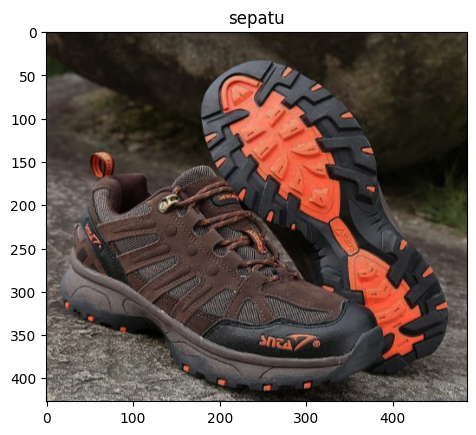

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "sepatu")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

# BATCH_SIZE = 32
# IMG_SIZE = (224, 224)

# train_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/train",
#                                                             shuffle=True,
#                                                             batch_size=BATCH_SIZE,
#                                                             image_size=IMG_SIZE)

# validation_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/validation",
#                                                                  shuffle=True,
#                                                                  batch_size=BATCH_SIZE,
#                                                                  image_size=IMG_SIZE)

# test_dataset = tf.keras.utils.image_dataset_from_directory(directory="files/test",
#                                                            shuffle=True,
#                                                            batch_size=BATCH_SIZE,
#                                                            image_size=IMG_SIZE)

# batch_size = 32
# img_height = 240
# img_width = 240

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/train",
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/validation",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   directory="files/test",
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

Found 2596 images belonging to 12 classes.
Found 750 images belonging to 12 classes.
Found 379 images belonging to 12 classes.


In [ ]:
import numpy as np

# class_names = np.array(train_dataset.class_names)
# print(class_names)

In [ ]:
# normalization_layer = tf.keras.layers.Rescaling(1./255)
# train_ds = train_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
# val_ds = validation_data.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [ ]:
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input

base_model=tf.keras.applications.Xception(include_top=False, weights="imagenet",input_tensor=Input(shape=(224,224,3)))

In [ ]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
            tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
            tf.keras.layers.Dropout(rate=0.5),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(12, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 32)          589856    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 3, 3, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 288)               0         
                                                                 
 dense_5 (Dense)             (None, 12)                3468      
                                                      

In [ ]:
history = model.fit(train_data,
                    batch_size=32,
                    epochs=50,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/50
 8/82 [=>............................] - ETA: 11s - loss: 2.2938 - accuracy: 0.3281

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


82/82 [==============================] - 39s 338ms/step - loss: 1.2638 - accuracy: 0.6113 - val_loss: 0.6269 - val_accuracy: 0.8074
Epoch 2/50
82/82 [==============================] - 23s 287ms/step - loss: 0.6984 - accuracy: 0.7839 - val_loss: 0.6029 - val_accuracy: 0.8021
Epoch 3/50
82/82 [==============================] - 26s 310ms/step - loss: 0.5171 - accuracy: 0.8386 - val_loss: 0.5794 - val_accuracy: 0.8496
Epoch 4/50
82/82 [==============================] - 24s 288ms/step - loss: 0.3955 - accuracy: 0.8729 - val_loss: 0.4823 - val_accuracy: 0.8549
Epoch 5/50
82/82 [==============================] - 23s 274ms/step - loss: 0.3185 - accuracy: 0.8952 - val_loss: 0.6270 - val_accuracy: 0.8707
Epoch 6/50
82/82 [==============================] - 24s 287ms/step - loss: 0.2485 - accuracy: 0.9168 - val_loss: 0.5050 - val_accuracy: 0.8734
Epoch 7/50
82/82 [==============================] - 23s 285ms/step - loss: 0.1976 - accuracy: 0.9357 - val_loss: 0.6165 - val_accuracy: 0.8628
Epoch 8/50

In [ ]:
model.evaluate(test_data)

24/24 [==============================] - 7s 278ms/step - loss: 0.9048 - accuracy: 0.8947


[0.9047795534133911, 0.8946666717529297]

<Axes: >

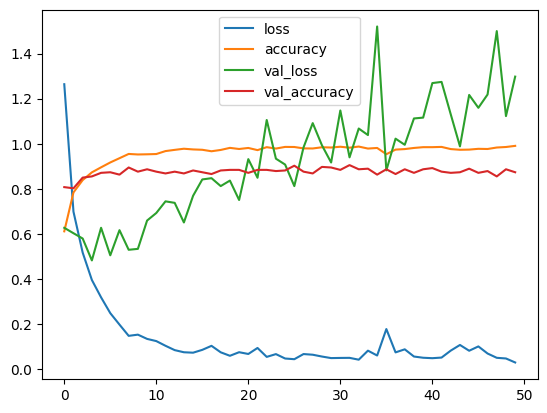

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("istockphoto-156726295-612x612.jpg", 224)

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 2s 2s/step


array([[1.25658497e-08, 8.25502251e-14, 6.63810912e-14, 1.10644065e-13,
        9.09700564e-19, 5.03345187e-20, 6.91002648e-13, 8.48288091e-16,
        7.96358392e-04, 9.99203622e-01, 5.44381241e-11, 3.20874572e-20]],
      dtype=float32)

In [ ]:
class_names[pred[0].argmax()]

'tas'

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
